In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

In [0]:
train_images = train_images / 255

test_images = test_images / 255

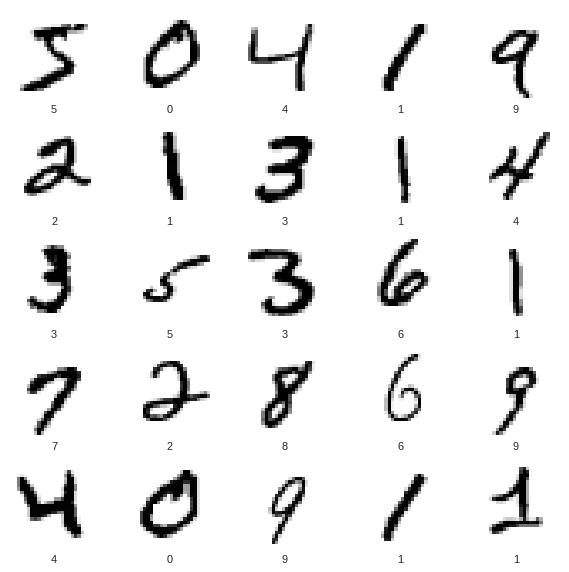

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

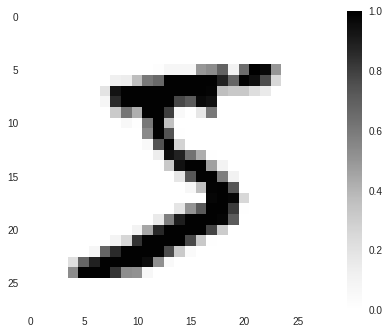

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
#training loop to test learning rates - this is overfitting to test set though

learning_rates = [0.001, 0.005, 0.0001, 0.0005]
test_accuracies = []
for i in range(len(learning_rates)):
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation=tf.nn.relu),
      keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
  model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rates[i]),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
  
  model.fit(train_images, train_labels, epochs=7, verbose=0)
  
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  test_accuracies.append(test_acc)
  
  keras.backend.clear_session()

In [13]:
# best learning rate

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
  
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0007),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2893 - acc: 0.9186
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1300 - acc: 0.9627
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0910 - acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0685 - acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0533 - acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0431 - acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0346 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0283 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0235 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0193 - a

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/step
Test accuracy: 0.9796


In [0]:
predictions = model.predict(test_images)

In [23]:
print(np.argmax(predictions[0]))
print(test_labels[0])

7
7


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

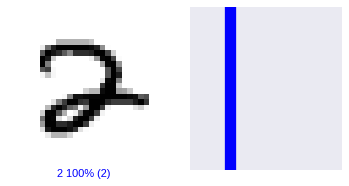

In [64]:
i = 764
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

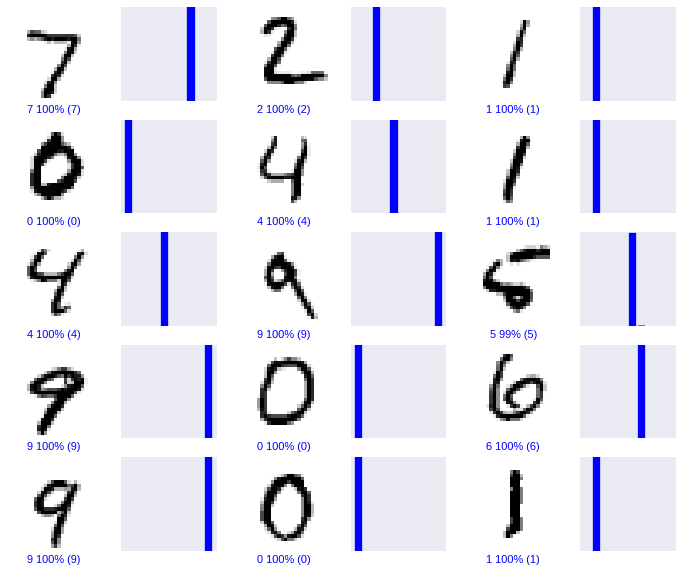

In [74]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [67]:
i=764
img = test_images[i]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


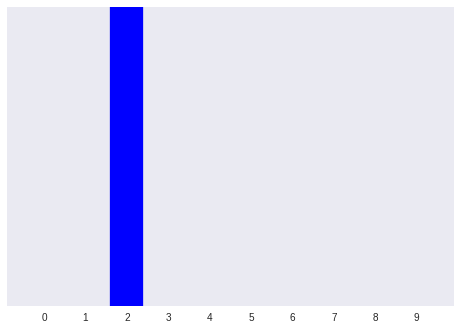

In [73]:
predictions_single = model.predict(img)

plot_value_array(i, predictions, test_labels)
_ = plt.xticks(range(10))